In [2]:
# Import required dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)

In [ ]:
df=pd.read_csv('https://docs.google.com/spreadsheets/d/1_ODNIn5n1k9RSVr_7gV2On4idZ6v0B2XPeMhCD18kio/pub?gid=1188863554&single=true&output=csv')
df

In [ ]:
df.dtypes

In [5]:
#df=df.set_index("voteId")

In [ ]:
df.head()

In [ ]:
dfwork=df[["decisionType",
"usCite",
"term",
"caseName",
"petitioner",
"petitionerState",
"respondent",
"respondentState",
"jurisdiction",
"adminAction",
"adminActionState",
"threeJudgeFdc",
"caseOrigin",
"caseOriginState",
"caseSource",
"caseSourceState",
"lcDisagreement",
"certReason",
"lcDisposition",
"lcDispositionDirection",
"declarationUncon",
"caseDisposition",
"caseDispositionUnusual",
"partyWinning",
"precedentAlteration",
"voteUnclear",
"issue",
"issueArea",
"decisionDirection",
"decisionDirectionDissent",
"authorityDecision1",
"authorityDecision2",
"lawSupp",
"majOpinWriter",
"majOpinAssigner",
"majVotes",
"minVotes"]]
dfwork

In [8]:
y=dfwork["caseDisposition"]
X=dfwork.drop(columns=["caseDisposition"])

In [6]:
y=dfwork["caseDisposition"]
#nullYvals = y.isna().sum()
#print(nullYvals)
y=y.fillna(12)

In [14]:
y=y.fillna(12)

In [15]:
#Checking if Lexie's hair is a mess...
nullYvals = y.isna().sum()
print(nullYvals)

0


In [ ]:
# added by dipesh
path = "https://docs.google.com/spreadsheets/d/1_ODNIn5n1k9RSVr_7gV2On4idZ6v0B2XPeMhCD18kio/pub?gid=1188863554&single=true&output=csv"
df = pd.read_csv(path)
df1 = pd.DataFrame(df)
df1.head()
df1 = df1.set_index('voteId')
df1['term'].value_counts().sort_index().plot(kind='bar', color='skyblue')
df2 = df1[['chief','caseId']]
df2 = df2.sort_values(by='caseId',ascending=True)

df2['chief'].value_counts()
df2.pivot_table(index='chief',values='caseId',aggfunc='count').plot(kind='bar')

In [10]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, dtype='int')

In [11]:
X=df1.drop(columns=["caseDisposition"])
y=df1["caseDisposition"]
#nullYvals = y.isna().sum()
#print(nullYvals)
y=y.fillna(12)

In [11]:
X_transformed = ohe.fit_transform(X)

#X_train_encoded = pd.DataFrame(data=ohe.fit_transform(X_train), columns=ohe.get_feature_names_out())
X_transformed

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [17]:
# Split the data into training and testing sets using random_state=1
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, random_state=1)

In [22]:
# Create the KNN model with 9 neighbors
knn = KNeighborsClassifier(n_neighbors=9)

# Fit the model to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [23]:
train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)
print(f"Train/Test Score: {train_score:.3f}/{test_score:.3f}")


Train/Test Score: 0.754/0.696


k: 1, Train/Test Score: 1.000/0.756
k: 4, Train/Test Score: 0.825/0.710
k: 7, Train/Test Score: 0.770/0.702
k: 10, Train/Test Score: 0.747/0.694
k: 13, Train/Test Score: 0.727/0.691
k: 16, Train/Test Score: 0.716/0.686
k: 19, Train/Test Score: 0.708/0.677
k: 22, Train/Test Score: 0.703/0.677
k: 25, Train/Test Score: 0.701/0.673
k: 28, Train/Test Score: 0.698/0.676


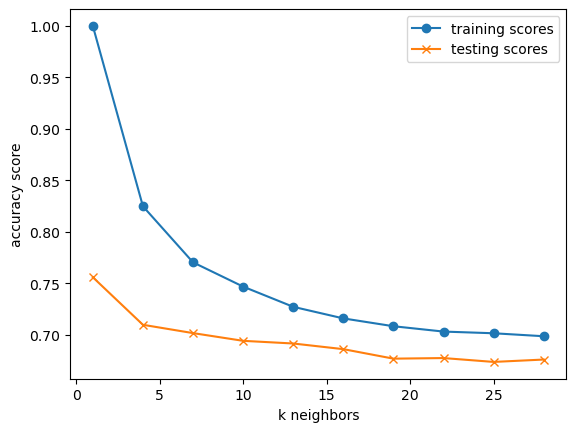

In [24]:
import matplotlib.pyplot as plt
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 30, 3):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot the results
plt.plot(range(1, 30, 3), train_scores, marker='o', label="training scores")
plt.plot(range(1, 30, 3), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()